# Use great expectations to read the quality of the data to test it out

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def open_csv(filepath: str, **kwargs):
    df = pd.read_csv(filepath, sep=",",header=0, **kwargs)
    return df

In [3]:
who_csv = open_csv("../.data/WHO.csv")

In [61]:
who_csv.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [16]:
who_csv.describe()["Under15"]

count    194.000000
mean      28.732423
std       10.534573
min       13.120000
25%       18.717500
50%       28.650000
75%       37.752500
max       49.990000
Name: Under15, dtype: float64

In [13]:
who_csv[who_csv["Under15"] == 13.12]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


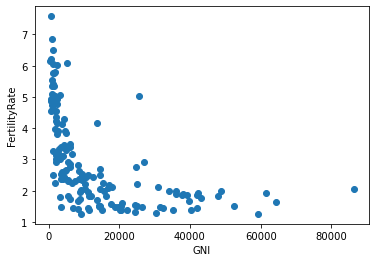

In [21]:
plt.scatter(who_csv["GNI"], who_csv["FertilityRate"])
plt.xlabel("GNI")
plt.ylabel("FertilityRate")
plt.show() # or use semi-column on the command of this cell to remove text about plt plot

In [23]:
outliers = who_csv[(who_csv["GNI"] > 10000) & (who_csv["FertilityRate"] > 2.5)]

In [26]:
outliers.count()

Country                          7
Region                           7
Population                       7
Under15                          7
Over60                           7
FertilityRate                    7
LifeExpectancy                   7
ChildMortality                   7
CellularSubscribers              7
LiteracyRate                     6
GNI                              7
PrimarySchoolEnrollmentMale      4
PrimarySchoolEnrollmentFemale    4
dtype: int64

In [28]:
outliers[["Country", "GNI", "FertilityRate"]]

,Country,GNI,FertilityRate
22,Botswana,14550.0,2.71
55,Equatorial Guinea,25620.0,5.04
62,Gabon,13740.0,4.18
82,Israel,27110.0,2.92
87,Kazakhstan,11250.0,2.52
130,Panama,14510.0,2.52
149,Saudi Arabia,24700.0,2.76


In [29]:
who_csv.describe()["FertilityRate"]

count    183.000000
mean       2.940656
std        1.480984
min        1.260000
25%        1.835000
50%        2.400000
75%        3.905000
max        7.580000
Name: FertilityRate, dtype: float64

In [32]:
who_csv[who_csv["LiteracyRate"] == 99.8]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
43,Cuba,Americas,11271,16.58,17.95,1.46,78,5.5,11.69,99.8,NaN,100.0,99.7
57,Estonia,Europe,1291,15.69,23.92,1.62,76,3.6,138.98,99.8,20850.0,97.7,97.0
93,Latvia,Europe,2060,14.57,24.24,1.57,74,8.7,102.94,99.8,17700.0,95.0,96.8


Text(0, 0.5, 'Frequency')

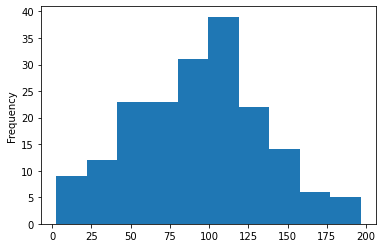

In [36]:
plt.hist(who_csv["CellularSubscribers"]);
plt.ylabel("Frequency")

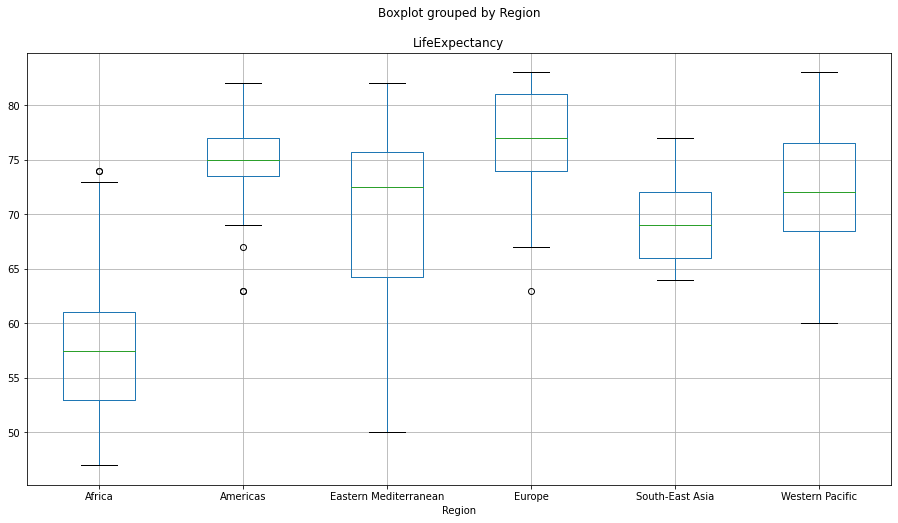

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
who_csv.boxplot(column="LifeExpectancy", by="Region", ax=ax)
plt.show()

In [58]:
who_csv.groupby("Region")["ChildMortality"].mean()

Region
Africa                   84.036957
Americas                 19.322857
Eastern Mediterranean    40.250000
Europe                   10.050943
South-East Asia          35.045455
Western Pacific          24.711111
Name: ChildMortality, dtype: float64

# USDA Exploration

In [6]:
import matplotlib.pyplot as plt

In [4]:
usda_csv = open_csv("../.data/USDA.csv")

In [78]:
# Find largest values in dataframe 
usda_csv.nlargest(1,["Sodium"])
usda_csv.loc[usda_csv["Sodium"].idxmax()]

ID                    2047
Description     SALT,TABLE
Calories               0.0
Protein                0.0
TotalFat               0.0
Carbohydrate           0.0
Sodium             38758.0
SaturatedFat           0.0
Cholesterol            0.0
Sugar                  0.0
Calcium               24.0
Iron                  0.33
Potassium              8.0
VitaminC               0.0
VitaminE               0.0
VitaminD               0.0
Name: 264, dtype: object

In [79]:
high_sodium = usda_csv.loc[usda_csv["Sodium"] > 10000]

In [84]:
high_sodium["Description"].unique()

array(['SALT,TABLE', 'SOUP,BF BROTH OR BOUILLON,PDR,DRY',
       'SOUP,BEEF BROTH,CUBED,DRY', 'SOUP,CHICK BROTH OR BOUILLON,DRY',
       'SOUP,CHICK BROTH CUBES,DRY', 'GRAVY,AU JUS,DRY', 'ADOBO FRESCO',
       'LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,NA AL SULFATE',
       'LEAVENING AGENTS,BAKING SODA', 'DESSERTS,RENNIN,TABLETS,UNSWTND'],
      dtype=object)

In [88]:
caviar = usda_csv.loc[usda_csv["Description"].str.contains("caviar", case=False)]
caviar["Sodium"]

4153    1500.0
Name: Sodium, dtype: float64

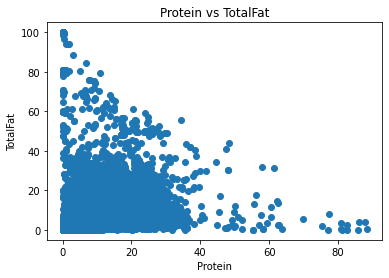

In [13]:
plt.scatter(usda_csv['Protein'], usda_csv['TotalFat'])
plt.title('Protein vs TotalFat')
plt.xlabel('Protein')
plt.ylabel('TotalFat');

Text(0, 0.5, 'Frequency')

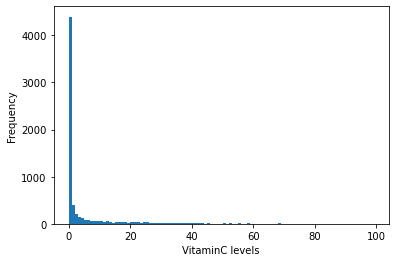

In [22]:
plt.hist(usda_csv["VitaminC"], range=(0,100), bins=range(100))
plt.xlabel("VitaminC levels")
plt.ylabel("Frequency")